# 01

## 데이터 읽기

In [1]:
import pandas as pd
cm = pd.read_csv('customer_master.csv')
cm.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [6]:
im = pd.read_csv('item_master.csv')
tran1 = pd.read_csv('transaction_1.csv')
transd1 = pd.read_csv('transaction_detail_1.csv')
im.head()


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


## 데이터 결합(concat) 세로 방향 조인

In [7]:
trans2 = pd.read_csv('transaction_2.csv')
trans = pd.concat([tran1, trans2], ignore_index=True)
trans.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [9]:

transd2 = pd.read_csv('transaction_detail_2.csv')
transd=pd.concat([transd1,transd2], ignore_index=True)
transd.head()


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 매출 데이터 결합 (merge) 가로 방향 조인

In [13]:


join_data = pd.merge(transd, trans[["transaction_id", "payment_date", "customer_id"]], 
                     on="transaction_id", how="left")
join_data.head()

#on='transaction_id' : transaction_id를 결합, how='left'transd를 기준으로 how='left'

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### 마스터 데이터 결합

In [14]:
join_data = pd.merge(join_data, cm, on="customer_id", how="left")
join_data = pd.merge(join_data, im, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


### 필요한 컬럼 만들기

In [15]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 데이터 검산

In [19]:
trans['price'].sum()


971135000

In [18]:
join_data['price'].sum()

971135000

In [20]:
print(trans['price'].sum()==join_data['price'].sum())

True


### 각종 통계량 파악

In [21]:
#1 결측치
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [22]:
#기초통계량
join_data.describe()
# 평균 50대
# 제일 비싼 물품가격 : 21만
# 제일 싼 물품 가격 : 5만
# 평균 1대~1.2대 판매



,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [25]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 월별 데이터 집계(날짜형 datetime)

In [26]:
join_data.dtypes # payment_date는 str임 향후 편의를 위해 datetime으로 변환

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [27]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data.dtypes
# to_datetime : 날짜형으로 바꿔주는 것

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
dtype: object

In [28]:
join_data['payment_ym'] = join_data['payment_date'].dt.strftime('%Y-%m')
join_data.head()
#.dt.strftime("%Y-%m")을 이용해 연-월만 가져옴                                                            

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_ym
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,2019-02
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,2019-02
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,2019-02


In [29]:
#연월 기준 pirce합계
join_data.groupby('payment_ym')['price'].sum()

payment_ym
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

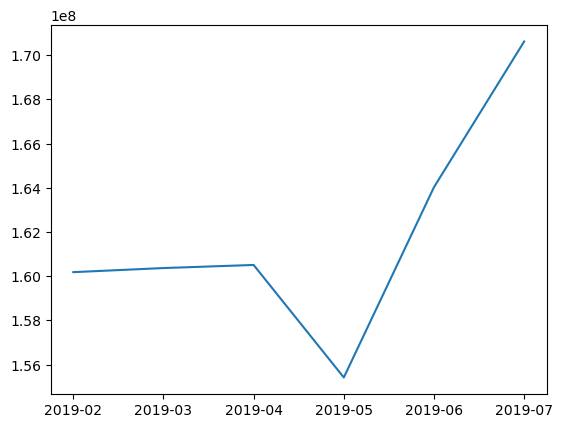

In [31]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(join_data.groupby('payment_ym')['price'].sum())
#plt.plot을 이용해 꺾은선 그래프로 나타냄


### 월별, 상품별로 데이터 집계(pivot_table)

In [32]:
# df.pivot_table(index, columns, values, aggfunc)
join_data.pivot_table(index = 'item_name', columns = 'payment_ym', values = ['price','quantity'], aggfunc='sum')

price                                                    \
payment_ym   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                
PC-A        24150000  26000000  25900000  24850000  26000000  25250000   
PC-B        25245000  25500000  23460000  25330000  23970000  28220000   
PC-C        19800000  19080000  21960000  20520000  21840000  19440000   
PC-D        31140000  25740000  24300000  25920000  28800000  26100000   
PC-E        59850000  64050000  64890000  58800000  63420000  71610000   

           quantity                                          
payment_ym  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                    
PC-A            483     520     518     497     520     505  
PC-B            297     300     276     298     282     332  
PC-C            165     159     183     171     182     162  
PC-D            173     143     135     144     160     145  
PC-E            285     305     309     280     302     341

### 상품별 매출 추이 시각화

In [33]:
# 이번엔 피벗테이블에서 행/열 인덱스의 위치를 바꾸기, price에 대해서만 집계
graph_data = join_data.pivot_table(index = 'payment_ym', columns = 'item_name', values='price',aggfunc='sum')
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_ym,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


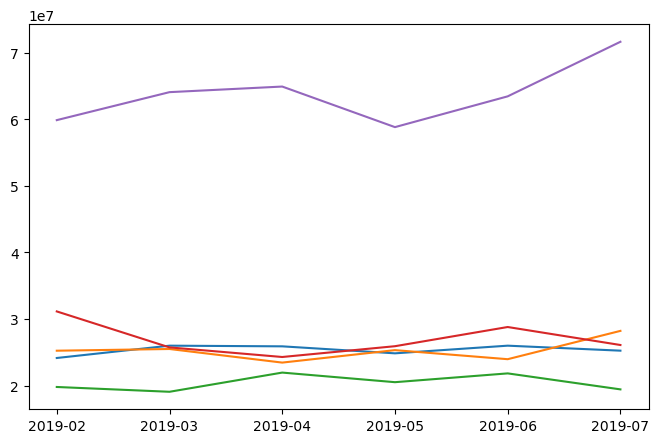

In [34]:
plt.figure(figsize=(8,5))
plt.plot(graph_data)

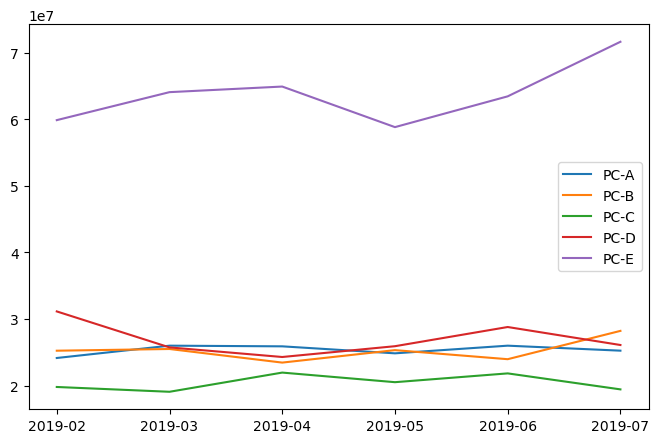

In [35]:
plt.figure(figsize=(8,5))
plt.plot(graph_data)
plt.legend(graph_data.columns) # legend에 라벨 달기

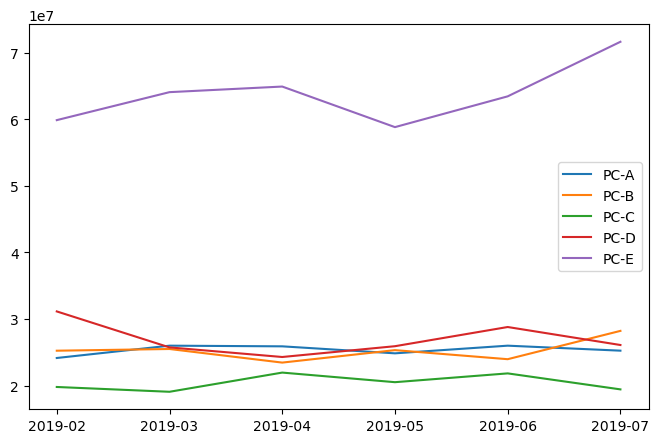

In [36]:
#자동화
plt.figure(figsize=(8,5))
sy = list(graph_data.columns)
for ind, value in enumerate(sy):
    plt.plot(list(graph_data.index), graph_data[value], label=value)
plt.legend()
# enumerate(item) 은 리스트 원소값에 순서 부여
# sy를 list(graph_data.columns)로 정의
# enumerate(sy) : columns인 PC-A,PC-B,PC-C... 이 순서대로 순서 부여
# for ind, value in enumerate(list):
# print('{}는 {}'.format(ind,value))
# enumerate는 for문과 자주 사용되며 for A,value in enumerate(list) 이렇게 쓰임
# A : 순서, value : 순서에 해당하는 값